In [3]:
import os
import numpy as np
import pickle
import pandas as pd
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define the path to your data
positive_base_path = 'E:\\capstone\\Phase 2\\Fmri_organized_data\\Fmri_organized_data\\positive'
negative_base_path = 'E:\\capstone\\Phase 2\\Fmri_organized_data\\Fmri_organized_data\\negative'

# Load the pre-trained VGG16 model
model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Function to process images and extract features
def extract_features(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Function to process an entire dataset (positive or negative)
def process_dataset(base_path, label):
    features_list = []
    for subject_folder in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject_folder)
        subject_features = []
        for image_file in os.listdir(subject_path):
            image_path = os.path.join(subject_path, image_file)
            features = extract_features(image_path)
            subject_features.append(features)
        # Average the features across slices for the subject
        averaged_features = np.mean(subject_features, axis=0)
        features_list.append((averaged_features, label))
    return features_list

# Process both positive and negative datasets
positive_features = process_dataset(positive_base_path, 1)  # Label 1 for positive
negative_features = process_dataset(negative_base_path, 0)  # Label 0 for negative

# Combine the positive and negative features into one dataset
combined_features = positive_features + negative_features
combined_features = shuffle(combined_features)  # Shuffle the dataset

# Convert to a DataFrame for easier manipulation
combined_df = pd.DataFrame([x[0] for x in combined_features])  # Extract features
combined_df['Label'] = [x[1] for x in combined_features]  # Extract labels

# Save the combined features to a pickle file
combined_pkl_path = 'E:\\capstone\\Phase 2\\capstone.pkl'
with open(combined_pkl_path, 'wb') as file:
    pickle.dump(combined_df, file)

# Optionally save to a CSV file
#combined_csv_path = 'C:\\Users\\knaik\\OneDrive\\Desktop\\cpstone\\cpstone.pkl'
#combined_df.to_csv(combined_csv_path, index=False)

#print(f"Combined features saved successfully at {combined_pkl_path} and {combined_csv_path}")

1/1 [==============================] - 1s 1s/step


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load the combined dataset from the pickle file
file_path = 'E:\capstone\Phase 2\capstone.pkl'
with open(file_path, 'rb') as file:
    combined_data = pickle.load(file)

# Check the structure of the DataFrame
print(combined_data.shape)  # Should print (num_samples, 25089)

# Separate features (all columns except 'Label') and labels ('Label' column)
X = combined_data.drop('Label', axis=1)
y = combined_data['Label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

# Initialize and train the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optional: Detailed classification metrics
print(classification_report(y_test, y_pred))

(166, 25089)
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.41      0.92      0.56        12
           1       0.86      0.27      0.41        22

    accuracy                           0.50        34
   macro avg       0.63      0.59      0.49        34
weighted avg       0.70      0.50      0.47        34



# Support Vector Machine

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the combined dataset from the pickle file
file_path = 'E:\capstone\Phase 2\capstone.pkl'
with open(file_path, 'rb') as file:
    combined_data = pickle.load(file)

# Check the structure of the DataFrame
print(combined_data.shape)  # Should print (num_samples, 25089)

# Separate features (all columns except 'Label') and labels ('Label' column)
X = combined_data.drop('Label', axis=1)
y = combined_data['Label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

# Initialize the SVM classifier (with kernel 'rbf' for non-linear classification)
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")

# Optional: Detailed classification metrics
print(classification_report(y_test, y_pred_svm))


(166, 25089)
SVM Accuracy: 0.5882352941176471
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        20
           1       0.00      0.00      0.00        14

    accuracy                           0.59        34
   macro avg       0.29      0.50      0.37        34
weighted avg       0.35      0.59      0.44        34



C:\Users\NITHIN S R\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITHIN S R\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITHIN S R\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

# Gradient Boosting Classifier (XGBoost)

In [7]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Load the combined dataset from the pickle file
file_path = 'E:\capstone\Phase 2\capstone.pkl'
with open(file_path, 'rb') as file:
    combined_data = pickle.load(file)

# Check the structure of the DataFrame
print(combined_data.shape)  # Should print (num_samples, 25089)

# Separate features (all columns except 'Label') and labels ('Label' column)
X = combined_data.drop('Label', axis=1)
y = combined_data['Label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )


# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

# Optional: Detailed classification metrics
print(classification_report(y_test, y_pred_xgb))


(166, 25089)
XGBoost Accuracy: 0.5588235294117647
              precision    recall  f1-score   support

           0       0.63      0.60      0.62        20
           1       0.47      0.50      0.48        14

    accuracy                           0.56        34
   macro avg       0.55      0.55      0.55        34
weighted avg       0.56      0.56      0.56        34



# Convolutional Neural Networks

In [9]:
import numpy as np
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the combined dataset from the pickle file
file_path = 'E:\capstone\Phase 2\capstone.pkl'
with open(file_path, 'rb') as file:
    combined_data = pickle.load(file)

# Separate features and labels
X = combined_data.drop('Label', axis=1)
y = combined_data['Label']

# Convert labels to categorical (binary classification: 0, 1)
y = to_categorical(y, num_classes=2)

# Reshape the features to fit the CNN (samples, height, width, channels)
# Assuming the feature vector length is 25088 (7x7x512 from VGG16) - Reshape to (7, 7, 512)
X = np.array(X)
X = X.reshape(-1, 7, 7, 512)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a CNN model with padding to prevent spatial size reduction
model = Sequential()

# First Conv2D layer (with 'same' padding to preserve spatial dimensions)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(7, 7, 512)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv2D layer (use 'same' padding)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(64, activation='relu'))

# Output layer for binary classification
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check the layer structure
model.summary()


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          147488    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)              

C:\Users\NITHIN S R\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITHIN S R\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITHIN S R\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## VGG16 Model

Epoch 1/50
4/4 [==============================] - 1s 119ms/step - loss: 3.6734 - accuracy: 0.3952 - val_loss: 1.7085 - val_accuracy: 0.4762
Epoch 2/50
4/4 [==============================] - 0s 64ms/step - loss: 2.0425 - accuracy: 0.4758 - val_loss: 0.7201 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 57ms/step - loss: 1.3167 - accuracy: 0.5161 - val_loss: 0.7605 - val_accuracy: 0.5952
Epoch 4/50
4/4 [==============================] - 0s 62ms/step - loss: 0.9683 - accuracy: 0.5887 - val_loss: 1.0861 - val_accuracy: 0.4762
Epoch 5/50
4/4 [==============================] - 0s 57ms/step - loss: 0.8152 - accuracy: 0.5645 - val_loss: 0.7481 - val_accuracy: 0.5476


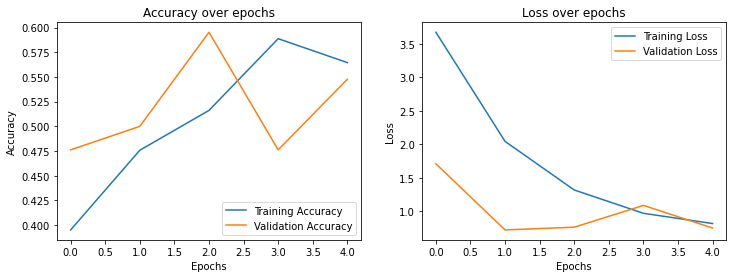

Model saved as schizophrenia_classifier_model.h5


C:\Users\NITHIN S R\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import os
import numpy as np
import pickle
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the combined features from the pickle file
combined_pkl_path = 'E:\\capstone\\Phase 2\\capstone.pkl'
with open(combined_pkl_path, 'rb') as file:
    combined_df = pickle.load(file)

# Prepare the data
X = np.array([features for features in combined_df.iloc[:, :-1].values])
y = np.array(combined_df['Label'].values)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model architecture for classification
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),  # Reduced neurons
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])




# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Train the model without ealry stopping
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32
# )


# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the trained model
model.save('schizophrenia_classifier_model.h5')
print("Model saved as schizophrenia_classifier_model.h5")


## model similar to pdf

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the VGG16 model with imagenet weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers of the VGG16 model for fine-tuning
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Define paths to training and validation data (adjust paths as needed)
train_directory = 'path_to_train_data'  # Update with actual path
validation_directory = 'path_to_validation_data'  # Update with actual path

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping]
)

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model
model.save('schizophrenia_classifier_vgg16_finetuned.h5')
print("Model saved as schizophrenia_classifier_vgg16_finetuned.h5")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_train_data'

In [3]:
!pip install nibabel pillow



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
